In [19]:
import torch
import torch.utils.data

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from map_class import MapClass

In [22]:
#buildings data
building_sizes = [[0.1, 0.3], [0.1, 0.2], [1., 1.], [0.125, 0.2], [0.529, 0.12], [1.0, 0.3], [0.33, 0.3], 
                  [0.4, 0.4], [0.67, 0.3], [.33, 0.7], [.5, 0.1]]
#     torch.rand((10))

In [23]:
#gray colors data
gray_colors = [[0.1], [0.], [1.], [0.125], [0.529], [1.0], [0.33], [0.4], [0.67], [.33], [.5]]
#     torch.rand((10))

In [24]:
# Network configuration

data = building_sizes
batch_size = 4

length = 4
width = 3
number_iterations = 100

move_closer_coef = 0.5
iterations = 100

In [25]:
trainloader = ""

def load_data(data, batch_size=4, shuffle=False):
    dim = len(data[0])
    number_rows_data = len(data)
    
    trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    return trainloader, dim, number_rows_data

In [26]:
def large_cycle(map_, training_data):
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))
    for i in range(number_iterations):
        cycle(map_, training_data)
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))

In [27]:
training, dim, number_rows_data = load_data(data)

In [11]:
map1 = MapClass(length, width, dim, move_closer_coef)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2


In [12]:
map1.weights

tensor([[0.7103, 0.3377],
        [0.1249, 0.4858],
        [0.0015, 0.2291],
        [0.8317, 0.8603],
        [0.9940, 0.0060],
        [0.5858, 0.9051],
        [0.6342, 0.1414],
        [0.9989, 0.7230],
        [0.4733, 0.0700],
        [0.5761, 0.3498],
        [0.5727, 0.7534],
        [0.8650, 0.0603]])

In [13]:
map1.step(training, verbose=True)

row of data tensor([1., 1.])
tensor([3])


In [14]:
map1.weights

tensor([[0.8101, 0.5659],
        [0.3750, 0.6327],
        [0.1867, 0.3721],
        [0.9158, 0.9302],
        [0.9961, 0.3485],
        [0.6735, 0.9252],
        [0.7603, 0.4373],
        [0.9992, 0.8021],
        [0.5710, 0.2425],
        [0.6659, 0.4876],
        [0.6520, 0.7992],
        [0.8824, 0.1815]])

In [15]:
map1.distance_matrix

tensor([[0.0000, 1.0000, 2.0000, 1.0000, 1.4142, 2.2361, 2.0000, 2.2361, 2.8284,
         3.0000, 3.1623, 3.6056],
        [1.0000, 0.0000, 1.0000, 1.4142, 1.0000, 1.4142, 2.2361, 2.0000, 2.2361,
         3.1623, 3.0000, 3.1623],
        [2.0000, 1.0000, 0.0000, 2.2361, 1.4142, 1.0000, 2.8284, 2.2361, 2.0000,
         3.6056, 3.1623, 3.0000],
        [1.0000, 1.4142, 2.2361, 0.0000, 1.0000, 2.0000, 1.0000, 1.4142, 2.2361,
         2.0000, 2.2361, 2.8284],
        [1.4142, 1.0000, 1.4142, 1.0000, 0.0000, 1.0000, 1.4142, 1.0000, 1.4142,
         2.2361, 2.0000, 2.2361],
        [2.2361, 1.4142, 1.0000, 2.0000, 1.0000, 0.0000, 2.2361, 1.4142, 1.0000,
         2.8284, 2.2361, 2.0000],
        [2.0000, 2.2361, 2.8284, 1.0000, 1.4142, 2.2361, 0.0000, 1.0000, 2.0000,
         1.0000, 1.4142, 2.2361],
        [2.2361, 2.0000, 2.2361, 1.4142, 1.0000, 1.4142, 1.0000, 0.0000, 1.0000,
         1.4142, 1.0000, 1.4142],
        [2.8284, 2.2361, 2.0000, 2.2361, 1.4142, 1.0000, 2.0000, 1.0000, 0.0000,

In [16]:
map1.impact_matrix

tensor([[1.0000, 0.6892, 0.4237, 0.6892, 0.5716, 0.3711, 0.4237, 0.3711, 0.2579,
         0.2301, 0.2059, 0.1492],
        [0.6892, 1.0000, 0.6892, 0.5716, 0.6892, 0.5716, 0.3711, 0.4237, 0.3711,
         0.2059, 0.2301, 0.2059],
        [0.4237, 0.6892, 1.0000, 0.3711, 0.5716, 0.6892, 0.2579, 0.3711, 0.4237,
         0.1492, 0.2059, 0.2301],
        [0.6892, 0.5716, 0.3711, 1.0000, 0.6892, 0.4237, 0.6892, 0.5716, 0.3711,
         0.4237, 0.3711, 0.2579],
        [0.5716, 0.6892, 0.5716, 0.6892, 1.0000, 0.6892, 0.5716, 0.6892, 0.5716,
         0.3711, 0.4237, 0.3711],
        [0.3711, 0.5716, 0.6892, 0.4237, 0.6892, 1.0000, 0.3711, 0.5716, 0.6892,
         0.2579, 0.3711, 0.4237],
        [0.4237, 0.3711, 0.2579, 0.6892, 0.5716, 0.3711, 1.0000, 0.6892, 0.4237,
         0.6892, 0.5716, 0.3711],
        [0.3711, 0.4237, 0.3711, 0.5716, 0.6892, 0.5716, 0.6892, 1.0000, 0.6892,
         0.5716, 0.6892, 0.5716],
        [0.2579, 0.3711, 0.4237, 0.3711, 0.5716, 0.6892, 0.4237, 0.6892, 1.0000,

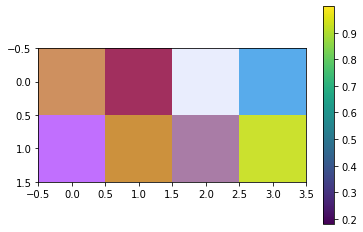

In [18]:
map1.basic_visualization()